# <span style="color:blue; font-size: 30px;"><b>Snigdha Chigurupati</span>
## <span style="color:blue">DATA 606-Capstone Project</span>
 

<div style="text-align: center; font-size: 25px;"><b><u>Introduction</div>

### Project Overview
    
This project aims to develop a recommender system using the IMDb movie dataset from Kaggle. The recommender system will provide personalized movie recommendations to users, helping them discover relevant movies based on their preferences and the rich information available in the dataset.

### Data Source

This dataset from kaggle created by Ashish Jangra, is having the data of size, 661 MB.

Total observations: 2590932

Features:

1. id - Movie ID
2. name - Name of the Movie
3. year - Year of movie release
4. rating - Rating of the Movie
5. certificate - Movie Certification
6. duration - Duration of the Movie
7. genre - Genre of the Movie
8. votes - Number of people who voted for the IMDB rating
9. gross_income - Gross Income of the Movie
10. directors_id - ID of Directors who have worked on the movie
11. directors_name - Name of the movie director
12. stars_id - Star ID
13. stars_name - Name of the stars in the movie
14. description - Movie description

Unit of Analysis: Movies(IMDB ratings, votes, genre, stars, director, description)

Dataset link: https://www.kaggle.com/datasets/ashishjangra27/imdb-movies-dataset

### Research Interests and outcomes

To understand the choice of the users and develop an accurate and effective recommendation system that suggests relevant movies to users based on their preferences and historical movie ratings. The system aims to enhance the movie-watching experience by reducing information overload and assisting users in discovering movies they are likely to enjoy.

<div style="text-align: center; font-size: 25px;"><b><u>Preliminary Analysis</div>

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

#### Reading the csv file

In [2]:
df = pd.read_csv("movies.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590932 entries, 0 to 2590931
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              object 
 1   name            object 
 2   year            object 
 3   rating          float64
 4   certificate     object 
 5   duration        object 
 6   genre           object 
 7   votes           object 
 8   gross_income    object 
 9   directors_id    object 
 10  directors_name  object 
 11  stars_id        object 
 12  stars_name      object 
 13  description     object 
dtypes: float64(1), object(13)
memory usage: 276.7+ MB


#### Checking for any missing values and duplicates

In [3]:
df.count()

id                2590932
name              2590932
year              2590932
rating            2590932
certificate       2590932
duration          2590932
genre             2590932
votes             2590932
gross_income      2590932
directors_id      2590932
directors_name    2590932
stars_id          2590932
stars_name        2590932
description       2590932
dtype: int64

In [4]:
null_values = df.isnull().sum()
null_values

id                0
name              0
year              0
rating            0
certificate       0
duration          0
genre             0
votes             0
gross_income      0
directors_id      0
directors_name    0
stars_id          0
stars_name        0
description       0
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)
df.count()

id                2590932
name              2590932
year              2590932
rating            2590932
certificate       2590932
duration          2590932
genre             2590932
votes             2590932
gross_income      2590932
directors_id      2590932
directors_name    2590932
stars_id          2590932
stars_name        2590932
description       2590932
dtype: int64

No missing values and no duplicates in the dataset

#### The original data

In [6]:
df

,id,name,year,rating,certificate,duration,genre,votes,gross_income,directors_id,directors_name,stars_id,stars_name,description
0,tt4710316,Best in Sex: 2015 AVN Awards,(2015 TV Special),4.0,TV-MA,94 min,"Adult, News",124.0,0,nm1624094,Gary Miller,"nm4766272,nm2670531,nm4920605,nm6284246","Farrah Laurel Abraham,Asa Akira,Anikka Albrite...",The hottest adult stars and top adult movies a...
1,tt1281857,Naughty Novelist,(2008 Video),3.8,Not Certified,88 min,Adult,174.0,0,nm0045256,John Bacchus,"nm0128986,nm1969196,nm0451160,nm6130462","Darian Caine,Jackie Stevens,A.J. Khan,Arrora",Darian is a successful journalist but when she...
2,tt2294954,2011 AVN Awards Show,(2011 TV Special),5.7,Not Certified,83 min,"Adult, News",39.0,0,"nm1624094,nm0754845","Gary Miller,Timothy E. Sabo","nm2200343,nm2670531,nm1267549,nm3585599","Aubrey Addams,Asa Akira,Monique Alexander,Rave...",Add a Plot
3,tt6843596,Best in Sex: 2017 AVN Awards,(2017 TV Special),4.9,TV-MA,87 min,"Adult, News",225.0,0,nm1624094,Gary Miller,"nm5221471,nm2670531,nm4920605,nm3038816","Amirah Adara,Asa Akira,Anikka Albrite,Britney ...","Considered the industry's highest honor, the A..."
4,tt3705604,AVN Awards 2014,(2014 TV Special),6.7,R,82 min,"Adult, News",101.0,0,nm1624094,Gary Miller,"nm2670531,nm4920605,nm6284246,nm3992720","Asa Akira,Anikka Albrite,August Ames,Jessie An...",Erotic filmmaking superstars Chanel Preston an...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590927,tt9898738,Alla mot alla med Filip och Fredrik,(2019– ),11.0,Not Certified,0 min,Game-Show,0,0,Anonymous,nm0000000,"nm1229568,nm1229296,nm10518401,nm0423935","Filip Hammar,Fredrik Wikingsson,Emma Frans,Eri...",Add a Plot
2590928,tt9898742,Alla mot alla med Filip och Fredrik,(2019– ),11.0,Not Certified,0 min,Game-Show,0,0,Anonymous,nm0000000,"nm1229568,nm1229296,nm0423935,nm2644274","Filip Hammar,Fredrik Wikingsson,Erik Johansson...",Add a Plot
2590929,tt9898746,Alla mot alla med Filip och Fredrik,(2019– ),11.0,Not Certified,0 min,Game-Show,0,0,Anonymous,nm0000000,"nm1229568,nm1229296,nm3355023,nm7732727","Filip Hammar,Fredrik Wikingsson,Hanna Hellquis...",Add a Plot
2590930,tt9898802,Aslan Max Eglence Fabrikasi,(2016–2017),11.0,Not Certified,0 min,Game-Show,0,0,Anonymous,nm0000000,Anonymous,nm0000000,Add a Plot


In [7]:
df['genre'].value_counts()

Game-Show                       143280
Sport                           126544
Music                            98922
Reality-TV                       96098
Animation, Action, Adventure     51650
                                 ...  
Adventure, Short, War                1
History, Music, War                  1
Fantasy, Drama, Horror               1
Sci-Fi, Horror, Drama                1
Crime, Romance, Action               1
Name: genre, Length: 3438, dtype: int64

Top genres were Game-shows, Sports, Music

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.1'),
  Text(2, 0, '1.2'),
  Text(3, 0, '1.3'),
  Text(4, 0, '1.4'),
  Text(5, 0, '1.5'),
  Text(6, 0, '1.6'),
  Text(7, 0, '1.7'),
  Text(8, 0, '1.8'),
  Text(9, 0, '1.9'),
  Text(10, 0, '2.0'),
  Text(11, 0, '2.1'),
  Text(12, 0, '2.2'),
  Text(13, 0, '2.3'),
  Text(14, 0, '2.4'),
  Text(15, 0, '2.5'),
  Text(16, 0, '2.6'),
  Text(17, 0, '2.7'),
  Text(18, 0, '2.8'),
  Text(19, 0, '2.9'),
  Text(20, 0, '3.0'),
  Text(21, 0, '3.1'),
  Text(22, 0, '3.2'),
  Text(23, 0, '3.3'),
  Text(24, 0, '3.4'),
  Text(25, 0, '3.5'),
  Text(26, 0, '3.6')

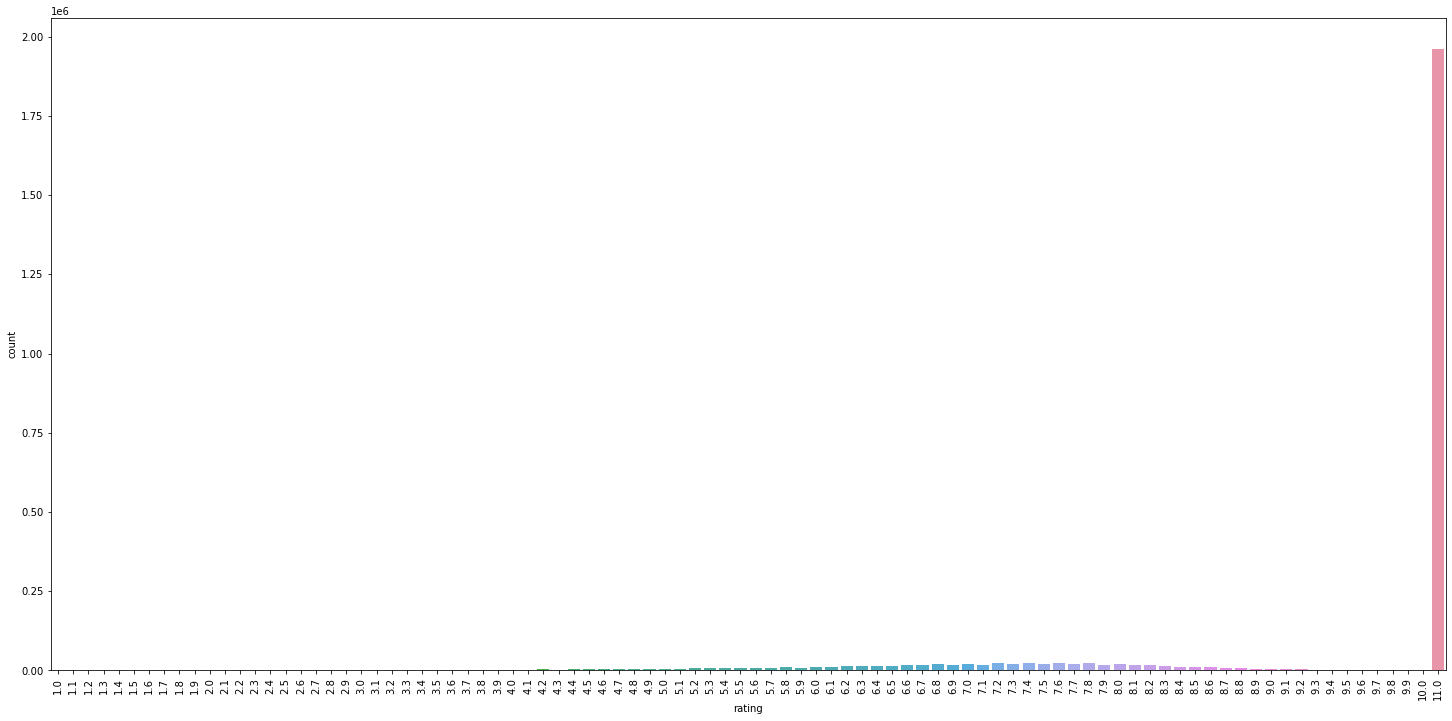

In [8]:
plt.figure(figsize=(25,12))
sns.countplot(df['rating'])
plt.xticks(rotation=90)

There is no 11 score rating in the IMDB scale of ratings, hence it is a synthetically generated value as a substitute for missing values in the dataset

Most of the movies have the rating between 6.8 and 7.8

In [9]:
chunk_size = len(df)//9
chunk_size

287881

In [10]:
sub_files = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

sub_files

Sub-File 1:                 id                          name               year  rating  \
0        tt4710316  Best in Sex: 2015 AVN Awards  (2015 TV Special)     4.0   
1        tt1281857              Naughty Novelist       (2008 Video)     3.8   
2        tt2294954          2011 AVN Awards Show  (2011 TV Special)     5.7   
3        tt6843596  Best in Sex: 2017 AVN Awards  (2017 TV Special)     4.9   
4        tt3705604               AVN Awards 2014  (2014 TV Special)     6.7   
...            ...                           ...                ...     ...   
287876   tt3557352                 My First Time             (2013)    11.0   
287877   tt7768348                          What        (II) (2017)    11.0   
287878  tt11404194             Dog Day Afternoon             (2019)    11.0   
287879   tt3763782             A Private Session             (2015)    11.0   
287880   tt9055872               Beyond the Door         (I) (2018)     3.0   

          certificate duration         

In [12]:
file_names = []
for i, sub_file in enumerate(sub_files):
    file_name = f'sub_files_{i+1}.xlsx'
    file_names.append(file_name)
    sub_file.to_excel(file_name, index=False)

The data has been segregated and output has been saved into 10 subfiles.